<a href="https://colab.research.google.com/github/parkhi0402/parkhi0402/blob/main/Final_Project_ParkhiAgarwal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparative sentiment analysis of public and private sector reactions in the US to the Inflation Reduction Act of 2022**

<br>

## **1. Introduction**

### **1.1 What is the Inflation Reduction Act?**
The Inflation Reduction Act of 2022 (IRA) is a United States federal law signed into effect by President Joe Biden on August 16, 2022.
The law aims to invest in domestic energy production while promoting clean energy by  providing various tax credits and incentives for renewable energy projects, to make the technologies more affordable.
It is the most significant action Congress has adopted on the fight against climate change in the US history with plans to invest $369 billion in energy security and climate change programs as well as to reduce carbon emissions by roughly 40 percent by 2030.

<br>

### **1.2 Research Question**
How do the sentiments of the public sector regarding the Inflation Reduction Act differ from those of the private sector in the US?

<br>

### **1.3 Research Hypothesis**

Based on my prior experience as a sustainable investing consultant, I hypothesized that the public and private sectors would have differing perspectives on the Inflation Reduction Act. Specifically, I anticipated that the public sector would focus on the policy's benefits and express greater appreciation for its goals, whereas the private sector would approach it with more skepticism, emphasizing potential costs and regulatory challenges.

<br>

### **1.4 Implications for Public Policy**
Since the successful implementation of a complex and pivotal policy like the IRA depends on collaboration between the public and private sectors, analyzing the sentiments of these two key stakeholders can provide policymakers with valuable insights into potential areas of alignment and conflict. Such research can bridge significant gaps between these perspectives, promoting a more balanced approach to policy design and implementation, ultimately enhancing its long-term effectiveness.

## **2. Data Collection, Cleaning and Exploration**

### **2.1 Data Collection**

The data for this research was manually collected by parsing through the websites of government agencies and selected private sector companies. Relevant articles and reports that referenced the IRA were carefully selected to capture insights from both sectors. The URLs of these sources were then organized into two separate CSV files: one for the public sector and the other for the private sector, ensuring a clear distinction between the perspectives of these two key stakeholders.

In [ ]:
#Importing the relevant libraries for data manipulation, analysis and extraction (from HTML documents)
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [ ]:
#Installing the pymupdf library to handle text extraction from PDF documents
!pip install pymupdf

In [ ]:
#Importing the relevant libraries to handle PDF documents
import io
import fitz

In [ ]:
#Mounting Google Drive to the Colab Environment
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Defining the path to the specific folder in Google Drive where project files are stored
path = '/content/drive/MyDrive/Python_2024/Final_Project'

In [ ]:
#Defining the file name for the CSV file containing public sector organization data
public_csv = 'Public Organisations.csv'

In [ ]:
#Reading the 'Public Organisations.csv' file into a pandas DataFrame for data manipulation
public_df = pd.read_csv(f'{path}/{public_csv}')

In [ ]:
#Displaying the contents of the DataFrame 'public_df' to inspect the data loaded from the CSV file
public_df

Name of organisation  \
0       United States Department of the Treasury    
1       United States Department of the Treasury    
2       United States Department of the Treasury    
3       United States Department of the Treasury    
4                                The White House    
5                                The White House    
6   United States General Services Administration   
7   United States Environmental Protection Agency   
8   United States Environmental Protection Agency   
9        United States Department of the Interior   
10       United States Department of the Interior   
11       United States Department of the Interior   
12       United States Department of the Interior   
13  United States Environmental Protection Agency   
14        House Committee on Energy and Commerce    

                                               Source         Type  
0   https://home.treasury.gov/policy-issues/inflat...  Article URL  
1   https://home.treasury.gov/policy-issues/inflat...  Article URL  
2   https://home.treasury.gov/news/featured-storie...  Article URL  
3   https://home.treasury.gov/news/featured-storie...  Article URL  
4   https://www.whitehouse.gov/briefing-room/state...  Article URL  
5   https://www.whitehouse.gov/briefing-room/blog/...  Article URL  
6   https://www.gsa.gov/about-us/gsa-regions/regio...      PDF URL  
7   https://www.epa.gov/green-power-markets/summar...  Article URL  
8   https://www.epa.gov/system/files/documents/202...      PDF URL  
9   https://www.doi.gov/pressreleases/inflation-re...  Article URL  
10        https://www.doi.gov/inflation-reduction-act  Article URL  
11  https://www.doi.gov/sites/default/files/interi...      PDF URL  
12  https://www.doi.gov/pressreleases/interior-dep...  Article URL  
13  https://www.epa.gov/system/files/documents/202...      PDF URL  
14  https://energycommerce.house.gov/posts/one-yea...  Article URL

In [ ]:
#Defining the file name for the CSV file containing private sector organization data
private_csv = 'Private Organisations.csv'

In [ ]:
#Reading the 'Private Organisations.csv' file into a pandas DataFrame for data manipulation
private_df = pd.read_csv(f'{path}/{private_csv}')

In [ ]:
#Displaying the contents of the DataFrame 'private_df' to inspect the data loaded from the CSV file
private_df

Name of organisation  \
0                  Bank of America   
1                  JP Morgan Chase   
2                  JP Morgan Chase   
3                  JP Morgan Chase   
4                         McKinsey   
5                         McKinsey   
6          Boston Consulting Group   
7                   Morgan Stanley   
8                   Morgan Stanley   
9                         Deloitte   
10                        Deloitte   
11                              EY   
12                             PwC   
13                             PwC   
14  Goldman Sachs Asset Management   
15                       Citigroup   

                                               Source         Type  
0   https://www.privatebank.bankofamerica.com/arti...  Article URL  
1   https://am.jpmorgan.com/gb/en/asset-management...  Article URL  
2   https://www.chase.com/personal/investments/lea...  Article URL  
3   https://www.jpmorgan.com/insights/banking/fina...  Article URL  
4   https://www.mckinsey.com/industries/public-sec...      PDF URL  
5   https://www.mckinsey.com/industries/public-sec...  Article URL  
6   https://media-publications.bcg.com/BCG-Executi...      PDF URL  
7   https://www.morganstanley.com/ideas/inflation-...  Article URL  
8   https://www.morganstanley.com/ideas/thoughts-o...  Article URL  
9   https://www2.deloitte.com/us/en/pages/tax/arti...  Article URL  
10  https://www2.deloitte.com/us/en/pages/tax/arti...      PDF URL  
11  https://www.ey.com/content/dam/ey-unified-site...      PDF URL  
12  https://www.pwc.com/us/en/industries/energy-ut...  Article URL  
13  https://www.pwc.com/us/en/services/esg/library...  Article URL  
14  https://am.gs.com/en-nl/advisors/insights/arti...  Article URL  
15  https://www.citigroup.com/global/insights/prot...  Article URL

### **2.2 Scraping**

In [ ]:
#Defining a function to scrape and extract text from a given URL, handling both PDF and HTML content
def scrape_article(url):
    response = requests.get(url)
    content_type = response.headers.get('content-type', '').lower()
    if 'pdf' in content_type:
        with io.BytesIO(response.content) as f:
            doc = fitz.open(stream=f, filetype="pdf") # adapted from documentation: https://pymupdf.readthedocs.io/en/latest/module.html
            pdf_text = ""
            for page in doc:
                pdf_text += page.get_text()
            return pdf_text
    else:
        response.encoding = 'utf-8'
        html_string = response.text
        soup = BeautifulSoup(html_string, 'html.parser')
        return soup.get_text()

In [ ]:
#Applying the 'scrape_article' function to each URL in the 'Source' column of the 'public_df' DataFrame. The scraped text from each article is stored in a new column 'text'
public_df['text'] = public_df['Source'].apply(scrape_article)

In [ ]:
#Viewing the 'public_df' DataFrame to ensure the scraping was successful.
public_df

Name of organisation  \
0       United States Department of the Treasury    
1       United States Department of the Treasury    
2       United States Department of the Treasury    
3       United States Department of the Treasury    
4                                The White House    
5                                The White House    
6   United States General Services Administration   
7   United States Environmental Protection Agency   
8   United States Environmental Protection Agency   
9        United States Department of the Interior   
10       United States Department of the Interior   
11       United States Department of the Interior   
12       United States Department of the Interior   
13  United States Environmental Protection Agency   
14        House Committee on Energy and Commerce    

                                               Source         Type  \
0   https://home.treasury.gov/policy-issues/inflat...  Article URL   
1   https://home.treasury.gov/policy-issues/inflat...  Article URL   
2   https://home.treasury.gov/news/featured-storie...  Article URL   
3   https://home.treasury.gov/news/featured-storie...  Article URL   
4   https://www.whitehouse.gov/briefing-room/state...  Article URL   
5   https://www.whitehouse.gov/briefing-room/blog/...  Article URL   
6   https://www.gsa.gov/about-us/gsa-regions/regio...      PDF URL   
7   https://www.epa.gov/green-power-markets/summar...  Article URL   
8   https://www.epa.gov/system/files/documents/202...      PDF URL   
9   https://www.doi.gov/pressreleases/inflation-re...  Article URL   
10        https://www.doi.gov/inflation-reduction-act  Article URL   
11  https://www.doi.gov/sites/default/files/interi...      PDF URL   
12  https://www.doi.gov/pressreleases/interior-dep...  Article URL   
13  https://www.epa.gov/system/files/documents/202...      PDF URL   
14  https://energycommerce.house.gov/posts/one-yea...  Article URL   

                                                 text  
0   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...  
1   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...  
2   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...  
3   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...  
4   \n\n\n\n\n\n\n\n\n\nFACT SHEET: Two Years In, ...  
5   \n\n\n\n\n\n\n\n\n\nThe Biden-Harris Administr...  
6   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nGS...  
7   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...  
8   J A N U A R Y  2 0 2 3\nINFLATION \nREDUCTION ...  
9   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...  
10  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...  
11  FACT SHEET\nInterior Department to Take Action...  
12  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...  
13  ELECTRICITY SECTOR \nEMISSIONS IMPACTS \nOF TH...  
14  One Year Later, Even President Biden Admits th...

In [ ]:
#Applying the 'scrape_article' function to each URL in the 'Source' column of the 'private_df' DataFrame. The scraped text from each article is stored in a new column 'text'
private_df['text'] = private_df['Source'].apply(scrape_article)

In [ ]:
#Viewing the 'private_df' DataFrame to ensure the scraping was successful.
private_df

Name of organisation  \
0                  Bank of America   
1                  JP Morgan Chase   
2                  JP Morgan Chase   
3                  JP Morgan Chase   
4                         McKinsey   
5                         McKinsey   
6          Boston Consulting Group   
7                   Morgan Stanley   
8                   Morgan Stanley   
9                         Deloitte   
10                        Deloitte   
11                              EY   
12                             PwC   
13                             PwC   
14  Goldman Sachs Asset Management   
15                       Citigroup   

                                               Source         Type  \
0   https://www.privatebank.bankofamerica.com/arti...  Article URL   
1   https://am.jpmorgan.com/gb/en/asset-management...  Article URL   
2   https://www.chase.com/personal/investments/lea...  Article URL   
3   https://www.jpmorgan.com/insights/banking/fina...  Article URL   
4   https://www.mckinsey.com/industries/public-sec...      PDF URL   
5   https://www.mckinsey.com/industries/public-sec...  Article URL   
6   https://media-publications.bcg.com/BCG-Executi...      PDF URL   
7   https://www.morganstanley.com/ideas/inflation-...  Article URL   
8   https://www.morganstanley.com/ideas/thoughts-o...  Article URL   
9   https://www2.deloitte.com/us/en/pages/tax/arti...  Article URL   
10  https://www2.deloitte.com/us/en/pages/tax/arti...      PDF URL   
11  https://www.ey.com/content/dam/ey-unified-site...      PDF URL   
12  https://www.pwc.com/us/en/industries/energy-ut...  Article URL   
13  https://www.pwc.com/us/en/services/esg/library...  Article URL   
14  https://am.gs.com/en-nl/advisors/insights/arti...  Article URL   
15  https://www.citigroup.com/global/insights/prot...  Article URL   

                                                 text  
0   \n\n\n\n\n\n\n\nInflation Reduction Act (IRA):...  
1   \n\n\n\n\n\n\n\n\n\n\n\n\n\n        \n        ...  
2   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nWh...  
3   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPowering...  
4   What’s in the Inflation Reduction Act (IRA) of...  
5   US states and the successful clean energy tran...  
6   Executive \nPerspectives\nUS Inflation Reducti...  
7   \n\n\n\n\n\nInflation Reduction Act Tax Credit...  
8   \n\n\n\n\n\nU.S. Public Policy: Thoughts on th...  
9   \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...  
10  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n...  
11  \n\n\n\n\nExternal PDF download | EY - Global\...  
12  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nEnergy and utili...  
13  \n\n\n\n\n\n\n\n\n\n\n\n\n\n\nInflation Reduct...  
14  The US Inflation Reduction Act Is Driving Clea...  
15  Protectionism and the US Inflation Reduction A...

In [ ]:
#Defining the path where the scraped public sector data will be saved as a CSV file and saving it
scraped_public_df_path = '/content/drive/MyDrive/Python_2024/Final_Project/scraped_public_data.csv'
public_df.to_csv(scraped_public_df_path, index=False)

In [ ]:
#Defining the path where the scraped private sector data will be saved as a CSV file
scraped_private_df_path = '/content/drive/MyDrive/Python_2024/Final_Project/scraped_private_data.csv'
private_df.to_csv(scraped_private_df_path, index=False)

### **2.3 Data Cleaning**
During my research, I noticed that the scraped text included numerous unnecessary elements, such as website links and advertisements, which was distorting my data. Hence, to address this, I manually cleaned the CSV file to eliminate these extraneous components, then imported the updated CSV file to create a new and refined DataFrame.

In [ ]:
#Defining the file name for the cleaned public sector data CSV file
public_cleaned_csv = 'scraped_public.csv'

In [ ]:
#Reading the cleaned public sector data CSV file into a pandas DataFrame for further analysis
public_cleaned_df = pd.read_csv(f'{path}/{public_cleaned_csv}')

In [ ]:
#Viewing the 'public_cleaned_df' DataFrame to ensure the scraping was successful.
public_cleaned_df

Name of organisation  \
0       United States Department of the Treasury    
1       United States Department of the Treasury    
2       United States Department of the Treasury    
3       United States Department of the Treasury    
4                                The White House    
5                                The White House    
6   United States General Services Administration   
7   United States Environmental Protection Agency   
8   United States Environmental Protection Agency   
9        United States Department of the Interior   
10       United States Department of the Interior   
11       United States Department of the Interior   
12       United States Department of the Interior   
13  United States Environmental Protection Agency   
14        House Committee on Energy and Commerce    

                                               Source         Type  \
0   https://home.treasury.gov/policy-issues/inflat...  Article URL   
1   https://home.treasury.gov/policy-issues/inflat...  Article URL   
2   https://home.treasury.gov/news/featured-storie...  Article URL   
3   https://home.treasury.gov/news/featured-storie...  Article URL   
4   https://www.whitehouse.gov/briefing-room/state...  Article URL   
5   https://www.whitehouse.gov/briefing-room/blog/...  Article URL   
6   https://www.gsa.gov/about-us/gsa-regions/regio...      PDF URL   
7   https://www.epa.gov/green-power-markets/summar...  Article URL   
8   https://www.epa.gov/system/files/documents/202...      PDF URL   
9   https://www.doi.gov/pressreleases/inflation-re...  Article URL   
10        https://www.doi.gov/inflation-reduction-act  Article URL   
11  https://www.doi.gov/sites/default/files/interi...      PDF URL   
12  https://www.doi.gov/pressreleases/interior-dep...  Article URL   
13  https://www.epa.gov/system/files/documents/202...      PDF URL   
14  https://energycommerce.house.gov/posts/one-yea...  Article URL   

                                                 text  
0   Inflation Reduction Act | U.S. Department of t...  
1   Impact and Stories | U.S. Department of the Tr...  
2   The Inflation Reduction Act: A Place-Based Ana...  
3   The Inflation Reduction Act’s Benefits and Cos...  
4   FACT SHEET: Two Years In, the Inflation Reduct...  
5   The Biden-Harris Administration Has Catalyzed ...  
6   GSA celebrates two-year anniversary of Inflati...  
7   Summary of Inflation Reduction Act provisions ...  
8   J A N U A R Y  2 0 2 3\nINFLATION \nREDUCTION ...  
9   Inflation Reduction Act Invests Over $120 Mill...  
10  Inflation Reduction Act | U.S. Department of t...  
11  FACT SHEET\nInterior Department to Take Action...  
12  Interior Department Announces Nearly $7 Millio...  
13  ELECTRICITY SECTOR \nEMISSIONS IMPACTS \nOF TH...  
14  One Year Later, Even President Biden Admits th...

In [ ]:
#Defining the file name for the cleaned private sector data CSV file
private_cleaned_csv = 'scraped_private.csv'

In [ ]:
#Reading the cleaned private sector data CSV file into a pandas DataFrame for further analysis
private_cleaned_df = pd.read_csv(f'{path}/{private_cleaned_csv}')

In [ ]:
#Viewing the 'private_cleaned_df' DataFrame to ensure the scraping was successful.
private_cleaned_df

Name of organisation  \
0                  Bank of America   
1                  JP Morgan Chase   
2                  JP Morgan Chase   
3                  JP Morgan Chase   
4                         McKinsey   
5                         McKinsey   
6          Boston Consulting Group   
7                   Morgan Stanley   
8                   Morgan Stanley   
9                         Deloitte   
10                        Deloitte   
11                              EY   
12                             PwC   
13                             PwC   
14  Goldman Sachs Asset Management   
15                       Citigroup   

                                               Source         Type  \
0   https://www.privatebank.bankofamerica.com/arti...  Article URL   
1   https://am.jpmorgan.com/gb/en/asset-management...  Article URL   
2   https://www.chase.com/personal/investments/lea...  Article URL   
3   https://www.jpmorgan.com/insights/banking/fina...  Article URL   
4   https://www.mckinsey.com/industries/public-sec...      PDF URL   
5   https://www.mckinsey.com/industries/public-sec...  Article URL   
6   https://media-publications.bcg.com/BCG-Executi...      PDF URL   
7   https://www.morganstanley.com/ideas/inflation-...  Article URL   
8   https://www.morganstanley.com/ideas/thoughts-o...  Article URL   
9   https://www2.deloitte.com/us/en/pages/tax/arti...  Article URL   
10  https://www2.deloitte.com/us/en/pages/tax/arti...      PDF URL   
11  https://www.ey.com/content/dam/ey-unified-site...      PDF URL   
12  https://www.pwc.com/us/en/industries/energy-ut...  Article URL   
13  https://www.pwc.com/us/en/services/esg/library...  Article URL   
14  https://am.gs.com/en-nl/advisors/insights/arti...  Article URL   
15  https://www.citigroup.com/global/insights/prot...  Article URL   

                                                 text  
0   Inflation Reduction Act (IRA): What Is It & Ta...  
1   How could the US election result impact the In...  
2   What the Inflation Reduction Act Could Mean Fo...  
3   Powering New Investments in Clean Energy | J.P...  
4   What’s in the Inflation Reduction Act (IRA) of...  
5   US states and the successful clean energy tran...  
6   Executive \nPerspectives\nUS Inflation Reducti...  
7   Inflation Reduction Act Tax Credit Planning | ...  
8   U.S. Public Policy: Thoughts on the Market | M...  
9   Driving Energy Equity With The Inflation Reduc...  
10  Advancing Energy Security | Deloitte US\n\n\n\...  
11  EY - Global\nThe Inflation Reduction Act, 2022...  
12  Energy and utilities guide to Inflation Reduct...  
13  Inflation Reduction Act 2022: Climate consider...  
14  The US Inflation Reduction Act Is Driving Clea...  
15  Protectionism and the US Inflation Reduction A...

### **2.4 Data Exploration**

A total of 15 documents were collected from six public sector organizations, primarily comprising government agencies overseeing various governmental functions, as well as the White House. Similarly, 16 documents were sourced from 10 private sector organizations, including prominent banks and consulting firms. The variety of documents from both sectors suggests that the IRA has captured widespread attention, offering a unique opportunity to analyze differing priorities.

In [ ]:
#Grouping all the public sector organisations and observing the number of documents for each
counts = public_cleaned_df.groupby(['Name of organisation']).size().reset_index(name='count')
counts

Name of organisation  count
0        House Committee on Energy and Commerce       1
1                               The White House       2
2       United States Department of the Interior      4
3      United States Department of the Treasury       4
4  United States Environmental Protection Agency      3
5  United States General Services Administration      1

In [ ]:
#Grouping all the private sector organisations and observing the number of documents for each
counts = private_cleaned_df.groupby(['Name of organisation']).size().reset_index(name='count')
counts

Name of organisation  count
0                 Bank of America      1
1         Boston Consulting Group      1
2                       Citigroup      1
3                        Deloitte      2
4                              EY      1
5  Goldman Sachs Asset Management      1
6                 JP Morgan Chase      3
7                        McKinsey      2
8                  Morgan Stanley      2
9                             PwC      2

## **3.Data Analysis**

### **3.1 Word Clouds and Lexical Densities**

Initially, when I created the word clouds, common terms like "inflation," "reduction," "act," and "tax" were dominating without offering significant analytical value. To address this, I added them as additional stopwords and omitted the word clouds generated before this adjustment to keep the report concise. Following Professor Krisel's suggestion, I also included "energy" as a stopword to help ensure more relevant terms emerged, enhancing the focus of the analysis.

In [ ]:
pwd

'/content/drive/MyDrive/Python_2024/Final_Project'

In [ ]:
cd $path

/content/drive/MyDrive/Python_2024/Final_Project


In [ ]:
!mkdir $path/files

mkdir: cannot create directory ‘/content/drive/MyDrive/Python_2024/Final_Project/files’: File exists


In [ ]:
#Importing the relevant libraries
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import glob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Importing the relevant libraries
import nltk
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#Iterating through the cleaned public and private sector data, extracting and cleaning the text using BeautifulSoup and saving each article as a separate text file in a specified directory, with filenames based on the organization and document type.

import os
from bs4 import BeautifulSoup

# Create a directory to store cleaned files
output_dir = f"{path}/files_cleaned"
os.makedirs(output_dir, exist_ok=True)

# Iterate over public_cleaned_df and save articles
for _, row in public_cleaned_df.iterrows():
    # Use BeautifulSoup to clean the text
    soup = BeautifulSoup(row['text'], 'html.parser')
    article = soup.get_text()

    # Create a file name based on the organization name and document type
    publication = row['Name of organisation'].replace(" ", "_").lower()
    doc_type = "public"  # Assuming public data
    file_name = f"{output_dir}/{publication}_{doc_type}.txt"

    # Write the article to a file
    with open(file_name, "w", encoding='utf-8') as file:
        file.write(article)

# Repeat for private_cleaned_df
for _, row in private_cleaned_df.iterrows():
    soup = BeautifulSoup(row['text'], 'html.parser')
    article = soup.get_text()

    publication = row['Name of organisation'].replace(" ", "_").lower()
    doc_type = "private"  # Assuming private data
    file_name = f"{output_dir}/{publication}_{doc_type}.txt"

    with open(file_name, "w", encoding='utf-8') as file:
        file.write(article)

In [ ]:
# Set up stopwords and lemmatizer
stops = stopwords.words('english') #importing nltk's English stopwords

# directory = 'files'
files = glob.glob(f"{output_dir}/*.txt")

lemmatizer = WordNetLemmatizer()

# Define helper function to get POS tags
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


In [ ]:
#Importing the relevant libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import glob

In [ ]:
mkdir $path/files_cleaned

mkdir: cannot create directory ‘/content/drive/MyDrive/Python_2024/Final_Project/files_cleaned’: File exists


In [ ]:
mkdir $path/wordclouds

mkdir: cannot create directory ‘/content/drive/MyDrive/Python_2024/Final_Project/wordclouds’: File exists


In [ ]:
ls

'Comparative Analysis on Response to the IRA_Python_FinalProject_pa2677.gslides'
 files/
 files_cleaned/
'Final Presentation Notes.gdoc'
'Final Project.ipynb'
'Final Project v2.ipynb'
'Private Organisations.csv'
'Private Organisations.xlsx'
'Public Organisations.csv'
'Public Organisations.xlsx'
 Renewable-energy-image.png
 scraped_private.csv
 scraped_private_data.csv
 scraped_public.csv
 scraped_public_data.csv
 sector_grouped_tfidf_slice.csv
 sector_grouped_tfidf_slice_table.png
 tfidf_df.csv
 wordclouds/


In [ ]:
#Adding relevant stopwords and combining public and private sector texts to generate cleaned text ready for Word Cloud visulations
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Set up stopwords and lemmatizer
stops = stopwords.words('english')

new_stopwords = ["inflation", "reduction", "act", "IRA", "u", "ira", "tax", "energy"]
stops.extend(new_stopwords)

lemmatizer = WordNetLemmatizer()

# Combine all text from public and private sectors into one string
combined_public_text = ' '.join(public_cleaned_df['text'].dropna())  # Joining all the public texts
combined_private_text = ' '.join(private_cleaned_df['text'].dropna())  # Joining all the private texts

# Function to clean and preprocess text
def preprocess_text(text):
    # Tokenize the text
    text_tokens = word_tokenize(text)

    # Convert to lowercase and remove non-alphanumeric tokens
    text_lower = [t.lower() for t in text_tokens if t.isalnum()]

    # Remove stopwords
    text_stops = [t for t in text_lower if t not in stops]

    # Lemmatize the text
    text_clean = [lemmatizer.lemmatize(t) for t in text_stops]

    return text_clean

# Process the combined text for public and private sectors
public_text_clean = preprocess_text(combined_public_text)
private_text_clean = preprocess_text(combined_private_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


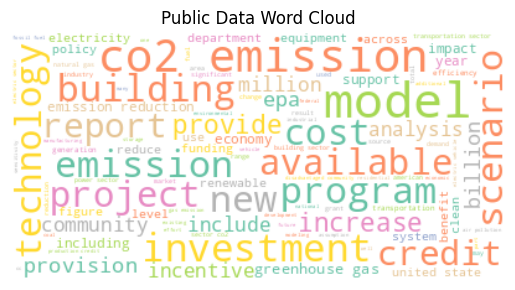

Public Data Lexical Density: 0.1155


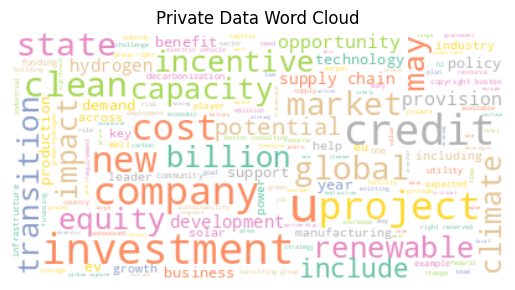

Private Data Lexical Density: 0.2019


In [ ]:
#Generating Word Clouds
def generate_word_cloud(text_clean, title):
    unique_string = " ".join(text_clean)
    wordcloud = WordCloud(max_font_size=40, background_color='white', colormap='Set2').generate(unique_string)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


# Calculate Lexical Density for the cleaned text
def calculate_lexical_density(text_clean):
    if len(text_clean) == 0:
        return 0  # Avoid division by zero if text is empty
    lexical_density = len(set(text_clean)) / len(text_clean)
    return lexical_density

# Generate word cloud for public data
generate_word_cloud(public_text_clean, 'Public Data Word Cloud')

# Calculate and print lexical density for public data
public_lexical_density = calculate_lexical_density(public_text_clean)
print(f"Public Data Lexical Density: {public_lexical_density:.4f}")

# Generate word cloud for private data
generate_word_cloud(private_text_clean, 'Private Data Word Cloud')

# Calculate and print lexical density for private data
private_lexical_density = calculate_lexical_density(private_text_clean)
print(f"Private Data Lexical Density: {private_lexical_density:.4f}")

**Analysing Results of the Combined Word Clouds**

1. **Renewable Energy Focus**: The public sector highlights terms such as **CO2** and **emission**, while the private sector emphasizes **renewable** and **clean**, showing that both sectors equally focus on the environmentally friendly aspects of the law, albeit through different terminology.

2. **Project-Oriented Language:** Public discourse often emphasizes terms like **project**, **model**, **program**, and **scenario**, reflecting a strong emphasis on structured planning and scenario-building—often geared toward policy implementation, while the private sector leans more toward concepts like **capacity**, **company**, and **market**, highlighting a more market-driven, results-oriented approach to project execution.

3. **Positive Words**: In the public sector, terms like **benefit**, **impact**, and **community** appear, though not as frequently as one might expect. This could suggest a need for stronger communication around the positive outcomes of policies. In contrast, the private sector features positive terms such as **impact**, **opportunity**, and **equity** more prominently, reflecting more emphasis on benefits and opportunities for investment.

4. **Cautious Language:** In the private sector, terms like **may** and **potential** convey a sense of cautious optimism, reflecting an awareness of risks and uncertainties tied to investments, capacities or projected outcomes.

5. **Financial Priorities**: Both the public and private sectors place equally significant emphasis on **cost**, **investment**, and **incentive**, reflecting shared priorities such as funding projects and managing financial risks. This was unexpected, as I had anticipated the private sector to emphasize more on these aspects.

6. **Emerging Solutions and Technology:** Words like **new** and **available** appear prominently, particularly in public data, with a notable focus on **technology**. Although the term "innovation" itself is not used frequently, these words indicate a strong emphasis on emerging solutions or technologies, especially within the public sector.

7. **High-Frequency Overlaps**: There are significant similarities especially in certain frequently used words such as **investment**, **project**, and **cost**.

Both sectors drive progress in renewable energy, financial investments, and innovation but:

**Public Sector:** Focuses on structured planning, emissions reduction, and community-driven policies, leveraging technology and modeling to advance sustainability goals.

**Private Sector:** Focuses on market opportunities, financial growth, and clean energy, balancing ambition with cautious optimism to manage risks and drive investment.

I found it intriguing that the private sector's word cloud prominently featured terms like **hydrogen**, **renewable**, and **clean**, highlighting a strong interest in sustainable energy solutions. This prompted me to explore the individual word clouds of each organization to uncover any additional terms that may have been overlooked in the aggregated analysis.

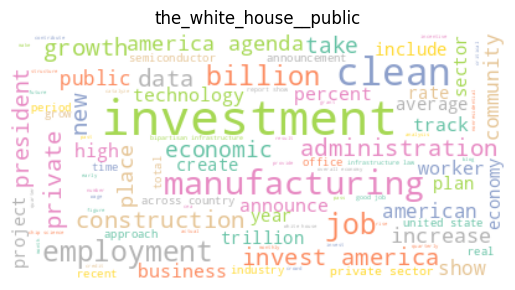

0.43888354186718


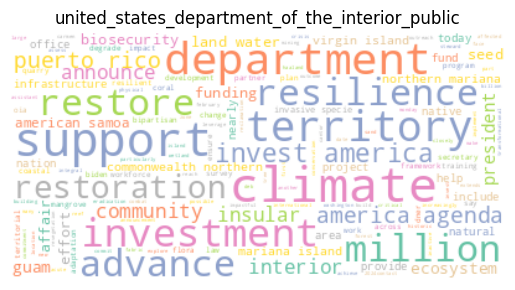

0.5098039215686274


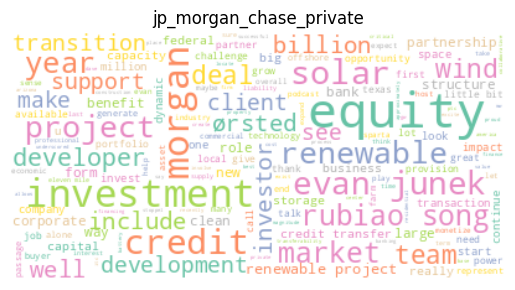

0.4054652880354505


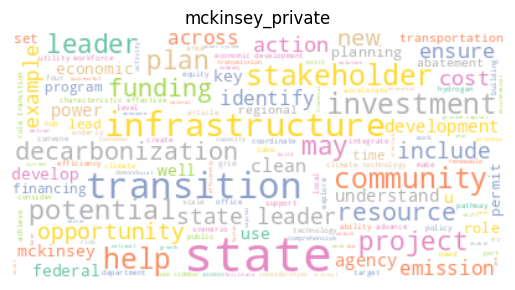

0.35517970401691334


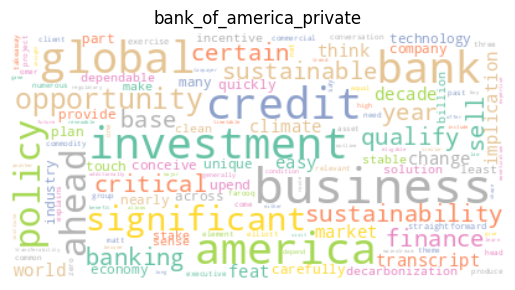

0.8269230769230769


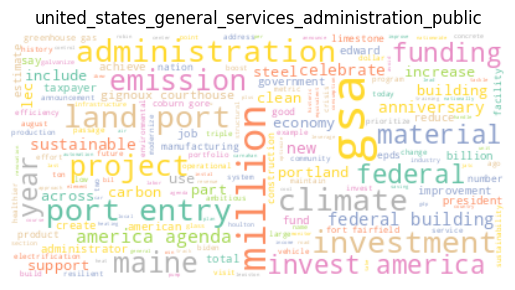

0.5007704160246533


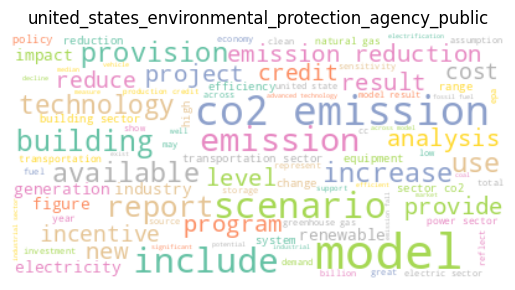

0.11303623124835512


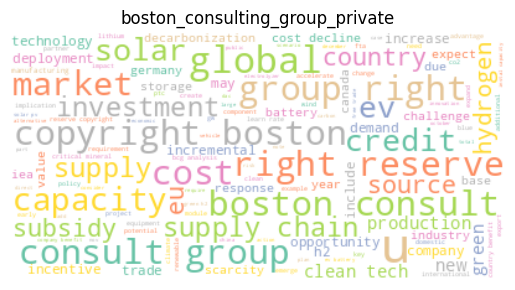

0.31376370280146165


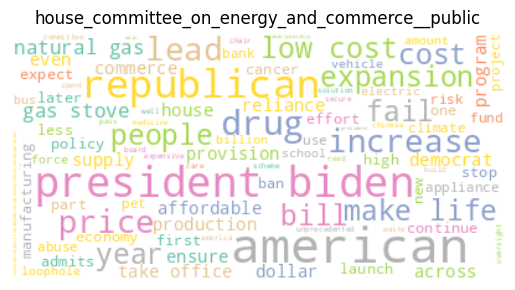

0.5991561181434599


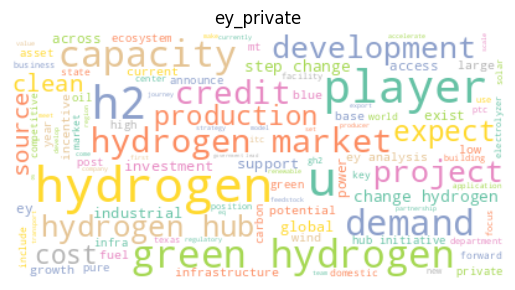

0.3932501834189288


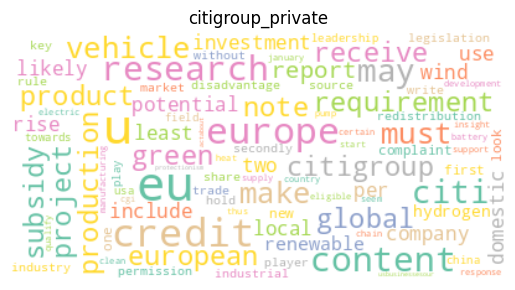

0.6223506743737958


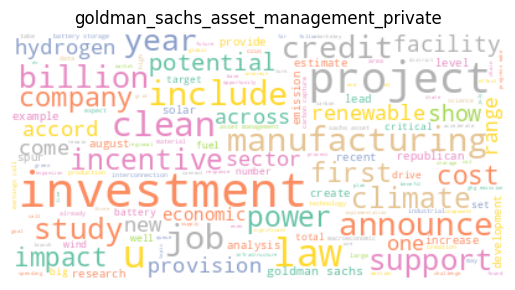

0.44266851980542044


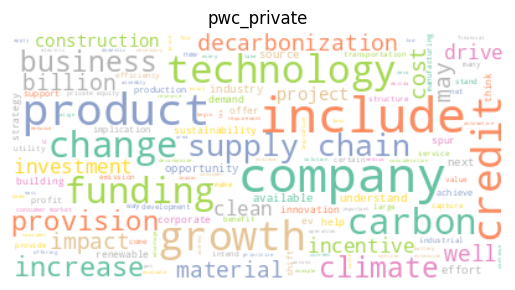

0.5012658227848101


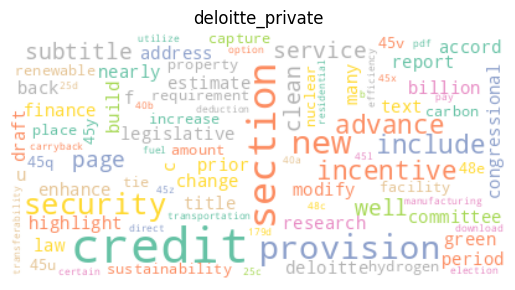

0.7089552238805971


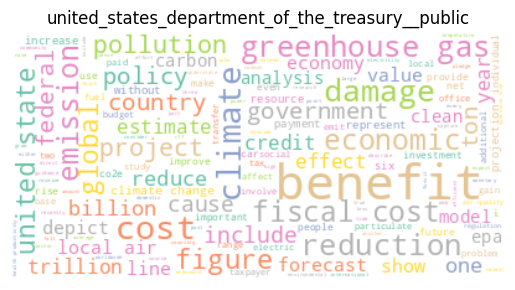

0.37951450562462996


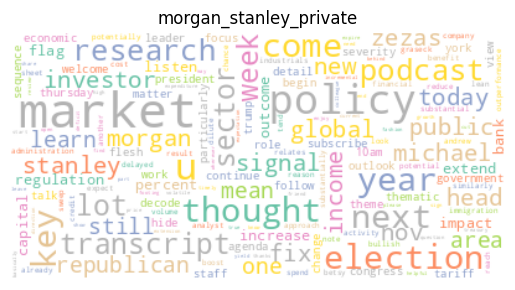

0.6907630522088354


In [ ]:
id = 0
lexical_density = []
for filepath in files:
    text = open(filepath, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    nltk_text = nltk.Text(text_tokens)
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stops]
    text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]

# save cleaned files
    file_name = filepath.split("/")[-1]
    file_name = file_name.split(".")[0]
    with open(f"files_cleaned/{file_name}.txt", "w") as file:
        file.write(str(text_clean))

# create Word Clouds

    unique_string=(" ").join(text_clean)
    wordcloud = WordCloud(max_font_size=40, background_color='white', colormap='Set2').generate(unique_string)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(file_name)
    plt.show()

# save Word Clouds
    wordcloud.to_file(f"{path}/wordclouds/word_cloud_{file_name}.png")
    # wordcloud.to_file(f"/wordclouds/wordcloud_{file_name}.png")

    ld_results = len(set(text_clean)) / len(text_clean)
    print(ld_results)
    ld_dict = {'File_name': file_name, 'lexical_density': ld_results}
    lexical_density.append(ld_dict)

What I found from the above analysis is that the public sector's focus on terms like **restore**, **federal**, and **agenda** reflects priorities in governance, infrastructure rebuilding, and addressing systemic challenges. Words like **expansion**, **restoration**, and **advance** highlight efforts to drive growth, recover resources, and promote progress. The use of **American** emphasizes a national identity and collective purpose, while references to **President Biden** and **Republican** suggest policies shaped by leadership and bipartisan dynamics.

The private sector's focus on terms like **solar**, **wind**, **EV**, and **hydrogen hub** highlights a commitment to renewable energy and decarbonization. Market-driven terms like **investor**, **client**, and **global** reflect priorities in financial opportunities and partnerships, while the emphasis on **sustainability** and **green** signifies the integration of environmental responsibility into business strategies.

In [ ]:
lexicaldensity_df = pd.DataFrame(lexical_density)
lexicaldensity_df = lexicaldensity_df.sort_values(by='lexical_density', ascending=False)
lexicaldensity_df

File_name  lexical_density
4                             bank_of_america_private         0.826923
13                                   deloitte_private         0.708955
15                             morgan_stanley_private         0.690763
10                                  citigroup_private         0.622351
8      house_committee_on_energy_and_commerce__public         0.599156
1     united_states_department_of_the_interior_public         0.509804
12                                        pwc_private         0.501266
5   united_states_general_services_administration_...         0.500770
11             goldman_sachs_asset_management_private         0.442669
0                             the_white_house__public         0.438884
2                             jp_morgan_chase_private         0.405465
9                                          ey_private         0.393250
14   united_states_department_of_the_treasury__public         0.379515
3                                    mckinsey_private         0.355180
7                     boston_consulting_group_private         0.313764
6   united_states_environmental_protection_agency_...         0.113036

With regards to **lexical densities**:

The overall lexical density of the **public sector is 0.1155**, while the **private sector's is 0.2019**. While the private sector has a higher lexical density, both sectors generally exhibit relatively low lexical densities. This could be attributed to the aggregation of large datasets, which may reduce the uniqueness of the words used.

To explore this further, I analyzed lexical densities by organization and found that they increased, with some reaching up to 0.8. Additionally, private sector organizations consistently had higher lexical densities, even among those with similar article lengths and quantities. This suggests that the private sector uses more technical jargon, likely to cater to a more targeted audience, such as clients and investors, with the goal of providing analysis, forecasts, or strategies. In contrast, the public sector employs more standardized language to ensure the content is easily understood by a broader audience.


### **3.2 TF-IDF**

Based on sectoral and organisation word clouds, identified a list of words I was interested in exploring the significance of further so I calculated the TF-IDF scores for those words.


In [ ]:
# importing necessary packages
from pathlib import Path
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from pathlib import Path
import glob

vectorizer = TfidfVectorizer(stop_words=None)  # Ensures no stopwords are removed
X = vectorizer.fit_transform(files)

In [ ]:
text_titles = [Path(text).stem for text in files]
text_titles

['the_white_house__public',
 'united_states_department_of_the_interior_public',
 'jp_morgan_chase_private',
 'mckinsey_private',
 'bank_of_america_private',
 'united_states_general_services_administration_public',
 'united_states_environmental_protection_agency_public',
 'boston_consulting_group_private',
 'house_committee_on_energy_and_commerce__public',
 'ey_private',
 'citigroup_private',
 'goldman_sachs_asset_management_private',
 'pwc_private',
 'deloitte_private',
 'united_states_department_of_the_treasury__public',
 'morgan_stanley_private']

In [ ]:
# initializing TfidVectorizer object
tfidf_vectorizer = TfidfVectorizer(input = 'filename', stop_words = stops)
type(tfidf_vectorizer)

sklearn.feature_extraction.text.TfidfVectorizer

In [ ]:
text_titles = [Path(text).stem for text in files]
text_titles

['the_white_house__public',
 'united_states_department_of_the_interior_public',
 'jp_morgan_chase_private',
 'mckinsey_private',
 'bank_of_america_private',
 'united_states_general_services_administration_public',
 'united_states_environmental_protection_agency_public',
 'boston_consulting_group_private',
 'house_committee_on_energy_and_commerce__public',
 'ey_private',
 'citigroup_private',
 'goldman_sachs_asset_management_private',
 'pwc_private',
 'deloitte_private',
 'united_states_department_of_the_treasury__public',
 'morgan_stanley_private']

In [ ]:
#Creating a dataframe of each term's tf-idf score for each file
tfidf_vector = tfidf_vectorizer.fit_transform(files)
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index = text_titles, columns = tfidf_vectorizer.get_feature_names_out()) #array format dataaset
tfidf_df

00        01  \
the_white_house__public                             0.000000  0.000000   
united_states_department_of_the_interior_public     0.000000  0.000000   
jp_morgan_chase_private                             0.000000  0.000000   
mckinsey_private                                    0.000000  0.000000   
bank_of_america_private                             0.000000  0.000000   
united_states_general_services_administration_p...  0.000000  0.000000   
united_states_environmental_protection_agency_p...  0.000000  0.001950   
boston_consulting_group_private                     0.007669  0.005976   
house_committee_on_energy_and_commerce__public      0.000000  0.000000   
ey_private                                          0.000000  0.011701   
citigroup_private                                   0.000000  0.000000   
goldman_sachs_asset_management_private              0.000000  0.000000   
pwc_private                                         0.000000  0.000000   
deloitte_private                                    0.000000  0.000000   
united_states_department_of_the_treasury__public    0.000000  0.000000   
morgan_stanley_private                              0.000000  0.000000   

                                                          02        03  \
the_white_house__public                             0.000000  0.000000   
united_states_department_of_the_interior_public     0.000000  0.000000   
jp_morgan_chase_private                             0.000000  0.000000   
mckinsey_private                                    0.000000  0.000000   
bank_of_america_private                             0.000000  0.000000   
united_states_general_services_administration_p...  0.000000  0.000000   
united_states_environmental_protection_agency_p...  0.000000  0.000000   
boston_consulting_group_private                     0.006679  0.006679   
house_committee_on_energy_and_commerce__public      0.000000  0.000000   
ey_private                                          0.013077  0.026153   
citigroup_private                                   0.000000  0.000000   
goldman_sachs_asset_management_private              0.000000  0.000000   
pwc_private                                         0.000000  0.000000   
deloitte_private                                    0.000000  0.000000   
united_states_department_of_the_treasury__public    0.000000  0.000000   
morgan_stanley_private                              0.000000  0.000000   

                                                          04        05  \
the_white_house__public                             0.000000  0.000000   
united_states_department_of_the_interior_public     0.000000  0.000000   
jp_morgan_chase_private                             0.000000  0.000000   
mckinsey_private                                    0.000000  0.000000   
bank_of_america_private                             0.000000  0.000000   
united_states_general_services_administration_p...  0.000000  0.000000   
united_states_environmental_protection_agency_p...  0.000000  0.000000   
boston_consulting_group_private                     0.006679  0.006679   
house_committee_on_energy_and_commerce__public      0.000000  0.000000   
ey_private                                          0.013077  0.013077   
citigroup_private                                   0.000000  0.000000   
goldman_sachs_asset_management_private              0.000000  0.000000   
pwc_private                                         0.000000  0.000000   
deloitte_private                                    0.000000  0.000000   
united_states_department_of_the_treasury__public    0.000000  0.000000   
morgan_stanley_private                              0.000000  0.000000   

                                                          06        07  \
the_white_house__public                             0.000000  0.000000   
united_states_department_of_the_interior_public     0.000000  0.000000   
jp_morgan_chase_private                             0.00000

In [ ]:
tfidf_df.loc['00_Document Frequency'] = (tfidf_df > 0).sum()


In [ ]:
tfidf_df

00        01  \
the_white_house__public                             0.000000  0.000000   
united_states_department_of_the_interior_public     0.000000  0.000000   
jp_morgan_chase_private                             0.000000  0.000000   
mckinsey_private                                    0.000000  0.000000   
bank_of_america_private                             0.000000  0.000000   
united_states_general_services_administration_p...  0.000000  0.000000   
united_states_environmental_protection_agency_p...  0.000000  0.001950   
boston_consulting_group_private                     0.007669  0.005976   
house_committee_on_energy_and_commerce__public      0.000000  0.000000   
ey_private                                          0.000000  0.011701   
citigroup_private                                   0.000000  0.000000   
goldman_sachs_asset_management_private              0.000000  0.000000   
pwc_private                                         0.000000  0.000000   
deloitte_private                                    0.000000  0.000000   
united_states_department_of_the_treasury__public    0.000000  0.000000   
morgan_stanley_private                              0.000000  0.000000   
00_Document Frequency                               1.000000  3.000000   

                                                          02        03  \
the_white_house__public                             0.000000  0.000000   
united_states_department_of_the_interior_public     0.000000  0.000000   
jp_morgan_chase_private                             0.000000  0.000000   
mckinsey_private                                    0.000000  0.000000   
bank_of_america_private                             0.000000  0.000000   
united_states_general_services_administration_p...  0.000000  0.000000   
united_states_environmental_protection_agency_p...  0.000000  0.000000   
boston_consulting_group_private                     0.006679  0.006679   
house_committee_on_energy_and_commerce__public      0.000000  0.000000   
ey_private                                          0.013077  0.026153   
citigroup_private                                   0.000000  0.000000   
goldman_sachs_asset_management_private              0.000000  0.000000   
pwc_private                                         0.000000  0.000000   
deloitte_private                                    0.000000  0.000000   
united_states_department_of_the_treasury__public    0.000000  0.000000   
morgan_stanley_private                              0.000000  0.000000   
00_Document Frequency                               2.000000  2.000000   

                                                          04        05  \
the_white_house__public                             0.000000  0.000000   
united_states_department_of_the_interior_public     0.000000  0.000000   
jp_morgan_chase_private                             0.000000  0.000000   
mckinsey_private                                    0.000000  0.000000   
bank_of_america_private                             0.000000  0.000000   
united_states_general_services_administration_p...  0.000000  0.000000   
united_states_environmental_protection_agency_p...  0.000000  0.000000   
boston_consulting_group_private                     0.006679  0.006679   
house_committee_on_energy_and_commerce__public      0.000000  0.000000   
ey_private                                          0.013077  0.013077   
citigroup_private                                   0.000000  0.000000   
goldman_sachs_asset_management_private              0.000000  0.000000   
pwc_private                                         0.000000  0.000000   
deloitte_private                                    0.000000  0.000000   
united_states_department_of_the_treasury__public    0.000000  0.000000   
morgan_stanley_private                              0.000000  0.000000   
00_Document Frequency                               2.000000  2.000000   

                                                          0

In [ ]:
tfidf_df.to_csv('tfidf_df.csv')

In [ ]:
#Convert both the words in the query and the DataFrame index to lowercase
query_words = ['climate', 'renewable', 'solar', 'wind', 'hydrogen', 'benefit', 'improve', 'innovation', 'new', 'market', 'growth', 'expansion', 'economy', 'employment', 'manufacturing', 'cost', 'policy', 'american', 'president', 'biden', 'republican']
query_words = [word.lower() for word in query_words]


In [ ]:
#Pulling words that I'm interested in
tfidf_slice = tfidf_df[['climate', 'renewable', 'solar', 'wind', 'hydrogen', 'benefit', 'improve', 'innovation', 'new', 'market', 'growth', 'expansion', 'economy', 'employment', 'manufacturing', 'cost', 'policy', 'american', 'president',  'biden', 'republican']]


In [ ]:
tfidf_slice

climate  renewable  \
the_white_house__public                              0.009147   0.000000   
united_states_department_of_the_interior_public      0.147027   0.000000   
jp_morgan_chase_private                              0.006020   0.159193   
mckinsey_private                                     0.070266   0.011261   
bank_of_america_private                              0.041686   0.050104   
united_states_general_services_administration_p...   0.081479   0.000000   
united_states_environmental_protection_agency_p...   0.019506   0.030879   
boston_consulting_group_private                      0.029165   0.014022   
house_committee_on_energy_and_commerce__public       0.031706   0.000000   
ey_private                                           0.011421   0.020591   
citigroup_private                                    0.000000   0.019183   
goldman_sachs_asset_management_private               0.094006   0.071903   
pwc_private                                          0.080839   0.064777   
deloitte_private                                     0.000000   0.043023   
united_states_department_of_the_treasury__public     0.162992   0.000000   
morgan_stanley_private                               0.000000   0.000000   
00_Document Frequency                               13.000000  10.000000   

                                                       solar      wind  \
the_white_house__public                             0.000000  0.000000   
united_states_department_of_the_interior_public     0.000000  0.000000   
jp_morgan_chase_private                             0.148459  0.090725   
mckinsey_private                                    0.012835  0.025670   
bank_of_america_private                             0.000000  0.000000   
united_states_general_services_administration_p...  0.000000  0.000000   
united_states_environmental_protection_agency_p...  0.022160  0.016294   
boston_consulting_group_private                     0.135851  0.039956   
house_committee_on_energy_and_commerce__public      0.000000  0.000000   
ey_private                                          0.031293  0.046939   
citigroup_private                                   0.021865  0.065596   
goldman_sachs_asset_management_private              0.058540  0.046832   
pwc_private                                         0.018458  0.018458   
deloitte_private                                    0.000000  0.000000   
united_states_department_of_the_treasury__public    0.000000  0.000000   
morgan_stanley_private                              0.000000  0.000000   
00_Document Frequency                               8.000000  8.000000   

                                                     hydrogen    benefit  \
the_white_house__public                              0.000000   0.000000   
united_states_department_of_the_interior_public      0.000000   0.014196   
jp_morgan_chase_private                              0.007236   0.044757   
mckinsey_private                                     0.039413   0.014925   
bank_of_america_private                              0.000000   0.044273   
united_states_general_services_administration_p...   0.000000   0.000000   
united_states_environmental_protection_agency_p...   0.022301   0.009600   
boston_consulting_group_private                      0.063099   0.065048   
house_committee_on_energy_and_commerce__public       0.000000   0.000000   
ey_private                                           0.603998   0.012130   
citigroup_private                                    0.057550   0.016951   
goldman_sachs_asset_management_private               0.071903   0.027229   
pwc_private                                          0.016194   0.042928   
deloitte_private                                     0.043023   0.000000   
united_states_department_of_the_treasury__public     0.006997   0.364761   
morgan_stanley_private                               0.000000   0.027860   
00_Document Frequency                               10.00000

In [ ]:
# Example mapping of text_titles to sectors
sector_mapping = {
    "morgan_stanley_private": "private",
    "united_states_department_of_the_treasury__public": "public",
    "the_white_house__public": "public",
    "jp_morgan_chase_private": "private",
    "bank_of_america_private": "private",
    "mckinsey_private": "private",
    "united_states_general_services_administration_public": "public",
    "boston_consulting_group_private": "private",
    "united_states_department_of_the_interior_public": "public",
    "united_states_environmental_protection_agency_public": "public",
    "house_committee_on_energy_and_commerce__public": "public",
    "ey_private": "private",
    "goldman_sachs_asset_management_private": "private",
    "deloitte_private": "private",
    "citigroup_private": "private",
    "pwc_private": "private"
}

# Add a sector column to the DataFrame
tfidf_df['sector'] = tfidf_df.index.map(sector_mapping)

# Group by sector and calculate mean TF-IDF scores for each term
sector_grouped = tfidf_df.groupby('sector').mean()

# Select the desired columns to create sector_grouped_tfidf_slice
sector_grouped_tfidf_slice = sector_grouped[['climate', 'renewable', 'solar', 'wind', 'hydrogen', 'benefit', 'improve', 'innovation', 'new', 'market', 'growth', 'expansion', 'economy', 'employment', 'manufacturing', 'cost', 'policy', 'american', 'president',  'biden', 'republican']]

# Display the grouped DataFrame
sector_grouped


00        01        02        03        04        05        06  \
sector                                                                          
private  0.000767  0.001768  0.001976  0.003283  0.001976  0.001976  0.000767   
public   0.000000  0.000325  0.000000  0.000000  0.000000  0.000000  0.000000   

               07        08        09  ...       yue   zealand      zero  \
sector                                 ...                                 
private  0.000767  0.001976  0.001534  ...  0.000000  0.001232  0.014237   
public   0.000000  0.000000  0.000000  ...  0.000208  0.000000  0.003170   

              zev     zezas     zhang      zhou       zip      zone    ørsted  
sector                                                                         
private  0.000000  0.013795  0.000000  0.000000  0.000000  0.000000  0.014247  
public   0.000208  0.000000  0.000208  0.000208  0.000208  0.005283  0.000000  

[2 rows x 4215 columns]

In [ ]:
sector_grouped_tfidf_slice

climate  renewable     solar      wind  hydrogen   benefit  \
sector                                                                 
private  0.033340   0.045406  0.042730  0.033418  0.090242  0.029610   
public   0.075309   0.005146  0.003693  0.002716  0.004883  0.064759   

          improve  innovation       new    market  ...  expansion   economy  \
sector                                             ...                        
private  0.003916    0.010422  0.048035  0.070339  ...   0.005879  0.009072   
public   0.013253    0.012430  0.034035  0.007212  ...   0.021352  0.043361   

         employment  manufacturing      cost    policy  american  president  \
sector                                                                        
private    0.000000       0.028564  0.051977  0.038099  0.001255   0.006185   
public     0.042921       0.041879  0.077909  0.030110  0.088924   0.068792   

            biden  republican  
sector                         
private  0.004587    0.019506  
public   0.048839    0.043312  

[2 rows x 21 columns]

In [ ]:
!pip install altair


In [ ]:
import altair as alt
import pandas as pd
import numpy as np

# Assuming sector_grouped_tfidf_slice contains the data you're interested in
# First, we'll need to reshape the DataFrame to a long format for easier plotting in Altair.

# Resetting the index so that 'sector' and 'term' can be used as categorical fields
sector_grouped_tfidf_slice_reset = sector_grouped_tfidf_slice.reset_index()

# Reshaping to long format (melt the dataframe)
df_long = sector_grouped_tfidf_slice_reset.melt(id_vars=['sector'], var_name='term', value_name='tfidf')

# Adding a little randomness to break ties in term ranking (optional)
df_long['tfidf'] = df_long['tfidf'] + np.random.rand(df_long.shape[0])*0.0001

# Set rank based on tfidf values for sorting
df_long['rank'] = df_long.groupby('sector')['tfidf'].rank(method='first', ascending=False)

# Terms in this list will get a red dot in the visualization
term_list = ['solar', 'wind', 'hydrogen', 'benefit', 'improve', 'innovation', 'economy', 'employment', 'manufacturing', 'cost']

# Altair visualization
base = alt.Chart(df_long).encode(
    x='rank:O',
    y='sector:N',
    color='tfidf:Q'
).transform_window(
    rank='rank()',
    sort=[alt.SortField("tfidf", order="descending")],
    groupby=["sector"]
)

# heatmap specification
heatmap = base.mark_rect().encode(
    color='tfidf:Q'
)

# red circle over terms in the term_list
circle = base.mark_circle(size=100).encode(
    color=alt.condition(
        alt.FieldOneOfPredicate(field='term', oneOf=term_list),
        alt.value('red'),
        alt.value('#FFFFFF00')
    )
)

# text labels, white for darker heatmap colors
text = base.mark_text(baseline='middle').encode(
    text='term:N',
    color=alt.condition(alt.datum.tfidf >= 0.23, alt.value('white'), alt.value('black'))
)

# display the heatmap, red circles, and text labels
(heatmap + circle + text).properties(width=1500, height=400)


alt.LayerChart(...)

In [ ]:
tfidf_df_long = sector_grouped_tfidf_slice.stack().reset_index()
tfidf_df_long = tfidf_df_long.rename(columns={0:'tfidf', 'level_0': 'document type','level_1': 'term'})
tfidf_df_long

sector           term     tfidf
0   private        climate  0.033340
1   private      renewable  0.045406
2   private          solar  0.042730
3   private           wind  0.033418
4   private       hydrogen  0.090242
5   private        benefit  0.029610
6   private        improve  0.003916
7   private     innovation  0.010422
8   private            new  0.048035
9   private         market  0.070339
10  private         growth  0.026893
11  private      expansion  0.005879
12  private        economy  0.009072
13  private     employment  0.000000
14  private  manufacturing  0.028564
15  private           cost  0.051977
16  private         policy  0.038099
17  private       american  0.001255
18  private      president  0.006185
19  private          biden  0.004587
20  private     republican  0.019506
21   public        climate  0.075309
22   public      renewable  0.005146
23   public          solar  0.003693
24   public           wind  0.002716
25   public       hydrogen  0.004883
26   public        benefit  0.064759
27   public        improve  0.013253
28   public     innovation  0.012430
29   public            new  0.034035
30   public         market  0.007212
31   public         growth  0.021010
32   public      expansion  0.021352
33   public        economy  0.043361
34   public     employment  0.042921
35   public  manufacturing  0.041879
36   public           cost  0.077909
37   public         policy  0.030110
38   public       american  0.088924
39   public      president  0.068792
40   public          biden  0.048839
41   public     republican  0.043312

In [ ]:
top_tfidf = tfidf_df_long.sort_values(by = ['sector', 'tfidf'], ascending = [True, False]).groupby(['sector']).head(10)


In [ ]:
top_tfidf

sector           term     tfidf
4   private       hydrogen  0.090242
9   private         market  0.070339
15  private           cost  0.051977
8   private            new  0.048035
1   private      renewable  0.045406
2   private          solar  0.042730
16  private         policy  0.038099
3   private           wind  0.033418
0   private        climate  0.033340
5   private        benefit  0.029610
38   public       american  0.088924
36   public           cost  0.077909
21   public        climate  0.075309
39   public      president  0.068792
26   public        benefit  0.064759
40   public          biden  0.048839
33   public        economy  0.043361
41   public     republican  0.043312
34   public     employment  0.042921
35   public  manufacturing  0.041879

**Private Sector**:

1. **Renewable Energy Focus**: Terms such as **renewable** (0.045), **solar** (0.043), and **wind** (0.033) emphasize the private sector's commitment to clean energy solutions. Among these, hydrogen (0.090) stands out with the highest score, signaling its importance as a priority area and suggesting tht it may require additional attention and financial support to scale up and achieve similar levels of adoption.

2. **Market and Innovation**: The prominence of terms like **market**(0.070), **new**(0.048) and **policy**(0.038) underscores the private sector's optimism regarding the impa*ct of innovative legislative frameworks such as the IRA to foster market growth.

**Public Sector**

1. **Political Messaging**: Terms like **American** (0.089), **President** (0.069), **Biden** (0.049), and **Republican** (0.043) prominently feature, suggesting a strong political framing of the public sector's communication to highlight the campaign's role in promoting political agendas and fostering public support for government initiatives.

2. **Economic Emphasis**: Words such as **economy** (0.043), **employment** (0.043), and **manufacturing** (0.042) underline the public sector's commitment to demonstrating tangible economic benefits, specifically focusing on job creation, industrial growth, and economic revitalization, which are critical for public buy-in.

**Both**:

Words like cost, climate, and benefit stand out with high TF-IDF scores across both sectors reflecting a mutual focus on the financial implications of the policy, urgency of addressing climate change, and propogate the narrative of positive outcomes.



###**3.3 Sentiment Analysis**

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sentimentAnalyzer = SentimentIntensityAnalyzer()

In [ ]:
def calculate_sentiment(text):
    scores = sentimentAnalyzer.polarity_scores(text)
    compound_scores = scores['compound'] #using compound scores
    return compound_scores

In [ ]:
public_cleaned_df['sentiment_score'] = public_cleaned_df['text'].apply(calculate_sentiment)
public_cleaned_df

Name of organisation  \
0       United States Department of the Treasury    
1       United States Department of the Treasury    
2       United States Department of the Treasury    
3       United States Department of the Treasury    
4                                The White House    
5                                The White House    
6   United States General Services Administration   
7   United States Environmental Protection Agency   
8   United States Environmental Protection Agency   
9        United States Department of the Interior   
10       United States Department of the Interior   
11       United States Department of the Interior   
12       United States Department of the Interior   
13  United States Environmental Protection Agency   
14        House Committee on Energy and Commerce    

                                               Source         Type  \
0   https://home.treasury.gov/policy-issues/inflat...  Article URL   
1   https://home.treasury.gov/policy-issues/inflat...  Article URL   
2   https://home.treasury.gov/news/featured-storie...  Article URL   
3   https://home.treasury.gov/news/featured-storie...  Article URL   
4   https://www.whitehouse.gov/briefing-room/state...  Article URL   
5   https://www.whitehouse.gov/briefing-room/blog/...  Article URL   
6   https://www.gsa.gov/about-us/gsa-regions/regio...      PDF URL   
7   https://www.epa.gov/green-power-markets/summar...  Article URL   
8   https://www.epa.gov/system/files/documents/202...      PDF URL   
9   https://www.doi.gov/pressreleases/inflation-re...  Article URL   
10        https://www.doi.gov/inflation-reduction-act  Article URL   
11  https://www.doi.gov/sites/default/files/interi...      PDF URL   
12  https://www.doi.gov/pressreleases/interior-dep...  Article URL   
13  https://www.epa.gov/system/files/documents/202...      PDF URL   
14  https://energycommerce.house.gov/posts/one-yea...  Article URL   

                                                 text  sentiment_score  
0   Inflation Reduction Act | U.S. Department of t...           0.9977  
1   Impact and Stories | U.S. Department of the Tr...           0.9998  
2   The Inflation Reduction Act: A Place-Based Ana...           0.9947  
3   The Inflation Reduction Act’s Benefits and Cos...           0.9998  
4   FACT SHEET: Two Years In, the Inflation Reduct...           0.9998  
5   The Biden-Harris Administration Has Catalyzed ...           0.9993  
6   GSA celebrates two-year anniversary of Inflati...           0.9984  
7   Summary of Inflation Reduction Act provisions ...           0.9997  
8   J A N U A R Y  2 0 2 3\nINFLATION \nREDUCTION ...           0.9999  
9   Inflation Reduction Act Invests Over $120 Mill...           0.9965  
10  Inflation Reduction Act | U.S. Department of t...           0.9826  
11  FACT SHEET\nInterior Department to Take Action...           0.9991  
12  Interior Department Announces Nearly $7 Millio...           0.9952  
13  ELECTRICITY SECTOR \nEMISSIONS IMPACTS \nOF TH...           1.0000  
14  One Year Later, Even President Biden Admits th...          -0.8422

In [ ]:
groupby_public_df = public_cleaned_df.groupby(['Name of organisation'])['text'].apply(' '.join).reset_index()

In [ ]:
groupby_public_df

Name of organisation  \
0        House Committee on Energy and Commerce    
1                               The White House    
2       United States Department of the Interior   
3      United States Department of the Treasury    
4  United States Environmental Protection Agency   
5  United States General Services Administration   

                                                text  
0  One Year Later, Even President Biden Admits th...  
1  FACT SHEET: Two Years In, the Inflation Reduct...  
2  Inflation Reduction Act Invests Over $120 Mill...  
3  Inflation Reduction Act | U.S. Department of t...  
4  Summary of Inflation Reduction Act provisions ...  
5  GSA celebrates two-year anniversary of Inflati...

In [ ]:
groupby_public_df['sentiment_score'] = groupby_public_df['text'].apply(calculate_sentiment)
groupby_public_df

Name of organisation  \
0        House Committee on Energy and Commerce    
1                               The White House    
2       United States Department of the Interior   
3      United States Department of the Treasury    
4  United States Environmental Protection Agency   
5  United States General Services Administration   

                                                text  sentiment_score  
0  One Year Later, Even President Biden Admits th...          -0.8422  
1  FACT SHEET: Two Years In, the Inflation Reduct...           0.9998  
2  Inflation Reduction Act Invests Over $120 Mill...           0.9998  
3  Inflation Reduction Act | U.S. Department of t...           1.0000  
4  Summary of Inflation Reduction Act provisions ...           1.0000  
5  GSA celebrates two-year anniversary of Inflati...           0.9984

In [ ]:
private_cleaned_df['sentiment_score'] = private_cleaned_df['text'].apply(calculate_sentiment)
private_cleaned_df

Name of organisation  \
0                  Bank of America   
1                  JP Morgan Chase   
2                  JP Morgan Chase   
3                  JP Morgan Chase   
4                         McKinsey   
5                         McKinsey   
6          Boston Consulting Group   
7                   Morgan Stanley   
8                   Morgan Stanley   
9                         Deloitte   
10                        Deloitte   
11                              EY   
12                             PwC   
13                             PwC   
14  Goldman Sachs Asset Management   
15                       Citigroup   

                                               Source         Type  \
0   https://www.privatebank.bankofamerica.com/arti...  Article URL   
1   https://am.jpmorgan.com/gb/en/asset-management...  Article URL   
2   https://www.chase.com/personal/investments/lea...  Article URL   
3   https://www.jpmorgan.com/insights/banking/fina...  Article URL   
4   https://www.mckinsey.com/industries/public-sec...      PDF URL   
5   https://www.mckinsey.com/industries/public-sec...  Article URL   
6   https://media-publications.bcg.com/BCG-Executi...      PDF URL   
7   https://www.morganstanley.com/ideas/inflation-...  Article URL   
8   https://www.morganstanley.com/ideas/thoughts-o...  Article URL   
9   https://www2.deloitte.com/us/en/pages/tax/arti...  Article URL   
10  https://www2.deloitte.com/us/en/pages/tax/arti...      PDF URL   
11  https://www.ey.com/content/dam/ey-unified-site...      PDF URL   
12  https://www.pwc.com/us/en/industries/energy-ut...  Article URL   
13  https://www.pwc.com/us/en/services/esg/library...  Article URL   
14  https://am.gs.com/en-nl/advisors/insights/arti...  Article URL   
15  https://www.citigroup.com/global/insights/prot...  Article URL   

                                                 text  sentiment_score  
0   Inflation Reduction Act (IRA): What Is It & Ta...           0.9860  
1   How could the US election result impact the In...           0.9984  
2   What the Inflation Reduction Act Could Mean Fo...           0.9992  
3   Powering New Investments in Clean Energy | J.P...           0.9999  
4   What’s in the Inflation Reduction Act (IRA) of...           0.9997  
5   US states and the successful clean energy tran...           1.0000  
6   Executive \nPerspectives\nUS Inflation Reducti...           1.0000  
7   Inflation Reduction Act Tax Credit Planning | ...           0.9990  
8   U.S. Public Policy: Thoughts on the Market | M...           0.9930  
9   Driving Energy Equity With The Inflation Reduc...           0.9997  
10  Advancing Energy Security | Deloitte US\n\n\n\...           0.9967  
11  EY - Global\nThe Inflation Reduction Act, 2022...           0.9991  
12  Energy and utilities guide to Inflation Reduct...           0.9999  
13  Inflation Reduction Act 2022: Climate consider...           0.9998  
14  The US Inflation Reduction Act Is Driving Clea...           0.9999  
15  Protectionism and the US Inflation Reduction A...           0.9964

In [ ]:
groupby_private_df = private_cleaned_df.groupby(['Name of organisation'])['text'].apply(' '.join).reset_index()

In [ ]:
groupby_private_df['sentiment_score'] = groupby_private_df['text'].apply(calculate_sentiment)
groupby_private_df

Name of organisation  \
0                 Bank of America   
1         Boston Consulting Group   
2                       Citigroup   
3                        Deloitte   
4                              EY   
5  Goldman Sachs Asset Management   
6                 JP Morgan Chase   
7                        McKinsey   
8                  Morgan Stanley   
9                             PwC   

                                                text  sentiment_score  
0  Inflation Reduction Act (IRA): What Is It & Ta...           0.9860  
1  Executive \nPerspectives\nUS Inflation Reducti...           1.0000  
2  Protectionism and the US Inflation Reduction A...           0.9964  
3  Driving Energy Equity With The Inflation Reduc...           0.9999  
4  EY - Global\nThe Inflation Reduction Act, 2022...           0.9991  
5  The US Inflation Reduction Act Is Driving Clea...           0.9999  
6  How could the US election result impact the In...           1.0000  
7  What’s in the Inflation Reduction Act (IRA) of...           1.0000  
8  Inflation Reduction Act Tax Credit Planning | ...           0.9987  
9  Energy and utilities guide to Inflation Reduct...           1.0000

In [ ]:
def positive_sentiment(text):
    scores = sentimentAnalyzer.polarity_scores(text)
    positive_scores = scores['pos'] #using compound scores
    return positive_scores
# this function was taken from lecture

In [ ]:
def negative_sentiment(text):
    scores = sentimentAnalyzer.polarity_scores(text)
    negative_scores = scores['neg'] #using compound scores
    return negative_scores

In [ ]:
groupby_public_df['positive_score'] = groupby_public_df['text'].apply(positive_sentiment)
groupby_public_df['negative_score'] = groupby_public_df['text'].apply(negative_sentiment)

In [ ]:
groupby_public_df

Name of organisation  \
0        House Committee on Energy and Commerce    
1                               The White House    
2       United States Department of the Interior   
3      United States Department of the Treasury    
4  United States Environmental Protection Agency   
5  United States General Services Administration   

                                                text  sentiment_score  \
0  One Year Later, Even President Biden Admits th...          -0.8422   
1  FACT SHEET: Two Years In, the Inflation Reduct...           0.9998   
2  Inflation Reduction Act Invests Over $120 Mill...           0.9998   
3  Inflation Reduction Act | U.S. Department of t...           1.0000   
4  Summary of Inflation Reduction Act provisions ...           1.0000   
5  GSA celebrates two-year anniversary of Inflati...           0.9984   

   positive_score  negative_score  
0           0.106           0.104  
1           0.123           0.024  
2           0.110           0.039  
3           0.196           0.053  
4           0.146           0.034  
5           0.109           0.016

In [ ]:
groupby_private_df['positive_score'] = groupby_private_df['text'].apply(positive_sentiment)
groupby_private_df['negative_score'] = groupby_private_df['text'].apply(negative_sentiment)

In [ ]:
groupby_private_df

Name of organisation  \
0                 Bank of America   
1         Boston Consulting Group   
2                       Citigroup   
3                        Deloitte   
4                              EY   
5  Goldman Sachs Asset Management   
6                 JP Morgan Chase   
7                        McKinsey   
8                  Morgan Stanley   
9                             PwC   

                                                text  sentiment_score  \
0  Inflation Reduction Act (IRA): What Is It & Ta...           0.9860   
1  Executive \nPerspectives\nUS Inflation Reducti...           1.0000   
2  Protectionism and the US Inflation Reduction A...           0.9964   
3  Driving Energy Equity With The Inflation Reduc...           0.9999   
4  EY - Global\nThe Inflation Reduction Act, 2022...           0.9991   
5  The US Inflation Reduction Act Is Driving Clea...           0.9999   
6  How could the US election result impact the In...           1.0000   
7  What’s in the Inflation Reduction Act (IRA) of...           1.0000   
8  Inflation Reduction Act Tax Credit Planning | ...           0.9987   
9  Energy and utilities guide to Inflation Reduct...           1.0000   

   positive_score  negative_score  
0           0.143           0.022  
1           0.120           0.020  
2           0.094           0.030  
3           0.287           0.009  
4           0.095           0.017  
5           0.157           0.014  
6           0.184           0.023  
7           0.181           0.017  
8           0.134           0.011  
9           0.204           0.021

Both sectors exhibit significantly higher positive sentiment scores than negative sentiment scores, indicating that the overall tone of the articles is highly favorable toward the IRA.

The exception is an article by the **House Committee on Energy and Commerce**, which demonstrates a **negative sentiment** with a score of -0.8422. This article criticizes the Biden Administration for not achieving sufficient progress in the implementation of the IRA, providing a rare instance of dissatisfaction within the public sector.

Overall, however, the sentiment across all the articles in both sectors is overwhelmingly positive, suggesting that both **public and private sector organizations** generally support the IRA and view it as a positive development. This could reflect confidence in the Act's potential for addressing energy, environmental, and economic issues, as well as fostering innovation and sustainability.

##**4. Conclusion**

This comparative sentiment analysis of public and private sector reactions to the IRA reveals a largely positive sentiment toward the legislation across both sectors, with subtle differences in emphasis and framing. The findings suggest that both sectors view the IRA as a significant step toward addressing climate change, promoting renewable energy, and enhancing economic opportunities. However, the way these sectors approach and communicate the Act differs, reflecting their distinct priorities and audiences.

**Public Sector:** The public sector's focus on political messaging, particularly around terms like **American**, **President**, **Biden**, and **Republican**, underscores the political nature of its communication, aimed at rallying support for the Act and framing it as a key government initiative. The public sector also emphasizes the economic benefits of the IRA, particularly in terms of **economy**, **employment**, and **manufacturing**, reflecting the government's focus on job creation and industrial revitalization. Despite this political framing, the overall sentiment is highly positive, with only a few critical voices, such as the article from the **House Committee on Energy and Commerce**, which critiques the Biden Administration's progress on the IRA.

**Private Sector:** The private sector, in contrast, demonstrates a more market-driven focus. Terms like **renewable**, **solar**, **wind**, and especially **hydrogen**, with its high TF-IDF score, indicate a strong interest in sustainable energy solutions and emerging technologies. The private sector is particularly focused on **market** opportunities and **innovation**, reflecting optimism about how the IRA can drive growth and investment. The language here is often more technical, indicating the sector's desire to align with new legislative frameworks while balancing risk.

Despite the differences in focus, both sectors show a shared interest in **cost**, **climate**, and **benefit**, highlighting mutual concern over the financial implications of the IRA and the urgency of addressing climate change. The **positive sentiment** scores overwhelmingly outnumber the **negative sentiment** scores across both sectors, suggesting broad support for the IRA's objectives and its potential for driving innovation and sustainability.

In conclusion, while both sectors support the IRA, the **public sector** frames it through a political lens, focusing on national and economic implications, while the **private sector** is more driven by market opportunities. Understanding these nuances can help policymakers ensure that both sectors work together effectively, facilitating the successful implementation of the IRA and maximizing its impact on energy, economy, and climate goals.

##**5. References**

- https://www.whitehouse.gov/briefing-room/statements-releases/2023/08/16/fact-sheet-one-year-in-president-bidens-inflation-reduction-act-is-driving-historic-climate-action-and-investing-in-america-to-create-good-paying-jobs-and-reduce-costs/

- https://www.energy.gov/sites/default/files/2022-08/8.18%20InflationReductionAct_Factsheet_Final.pdf



